In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
R_1 = int(np.random.uniform(1, 254))
G_1 = int(np.random.uniform(1, 254))
B_1 = int(np.random.uniform(1, 254))


R_2 = int(np.random.uniform(1, 254))
G_2 = int(np.random.uniform(1, 254))
B_2 = int(np.random.uniform(1, 254))

R_3 = int(np.random.uniform(1, 254))
G_3 = int(np.random.uniform(1, 254))
B_3 = int(np.random.uniform(1, 254))

In [ ]:
image_array = np.zeros((10, 10, 3))+ 255

image_array[1:9, 5] = [R_1, G_1, B_1]
image_array[1, 2:9] = [R_2, G_2, B_2]
image_array[8, 2:9] = [R_3, G_3, B_3]

print(R_1)
print(G_1)
print(B_1)

print(R_2)
print(G_2)
print(B_2)


print(R_3)
print(G_3)
print(B_3)

234
151
39
82
2
225
73
145
176


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.0..255.0].


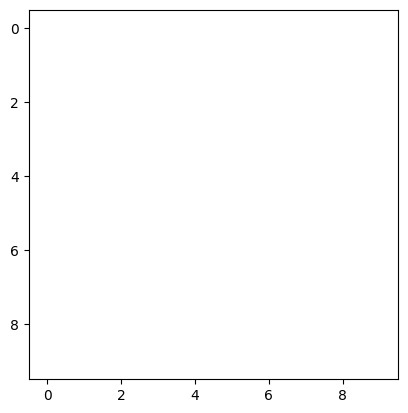

In [8]:
plt.imshow(image_array)